In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('heart.csv')
x = df.drop("target", axis=1)
y = df["target"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [9]:
dt = DecisionTreeClassifier(max_depth=3, random_state= 42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("Decision tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision tree Accuracy: 0.7804878048780488


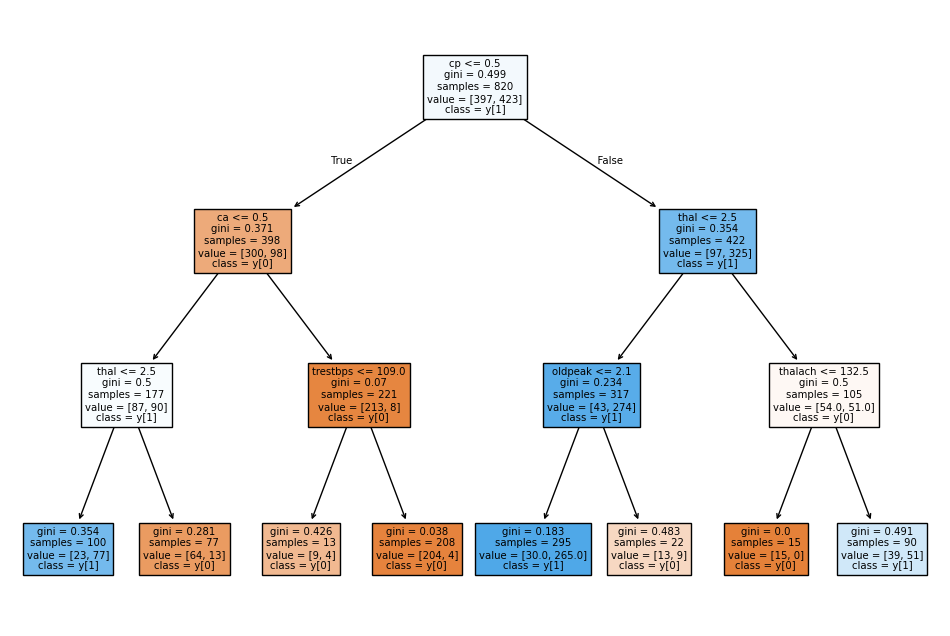

In [10]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt, feature_names=x.columns, class_names=True, filled=True)
plt.show()

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state= 42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


In [12]:
cv_scores = cross_val_score(rf, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


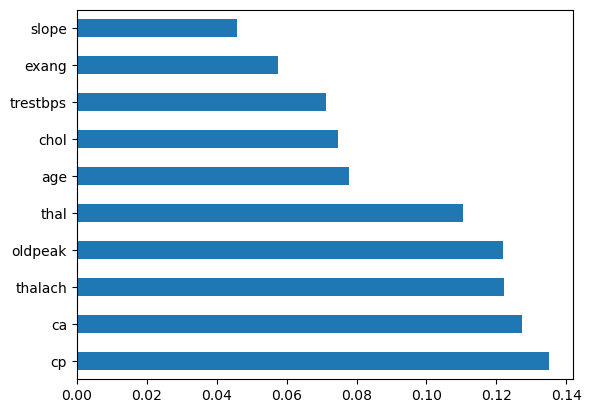

In [13]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index = x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()